<a href="https://colab.research.google.com/github/Dhineshks/nlp-workouts/blob/master/Classification/visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd drive/MyDrive/nlp

/content/drive/MyDrive/nlp


In [2]:
import pandas as pd

train_data = pd.read_csv("Corona_NLP_train.csv",encoding='latin-1')
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
train_data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [4]:
train_data['Location'].isnull().sum()

8590

In [5]:
# train_data['Location'].value_counts().head(50)

In [6]:
# train_data.dtypes

In [7]:
train_data['Sentiment_cat'] = train_data['Sentiment'].replace(['Positive'],0).replace(['Negative'],1).replace(['Neutral'],2).replace(['Extremely Positive'],3).replace(['Extremely Negative'],4)

[Text(0, 0, 'Positive'),
 Text(0, 0, 'Negative'),
 Text(0, 0, 'Neutral'),
 Text(0, 0, 'Extremely Positive'),
 Text(0, 0, 'Extremely Negative')]

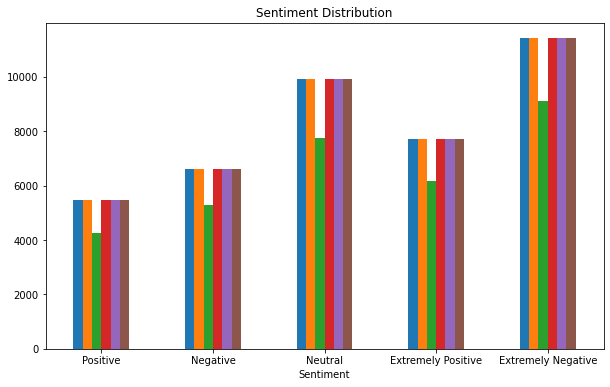

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)
ax = train_data.groupby('Sentiment').count().plot(kind='bar', title='Sentiment Distribution', legend=False)
ax.set_xticklabels(['Positive','Negative','Neutral','Extremely Positive','Extremely Negative'], rotation=0)

In [9]:
pos = train_data[train_data['Sentiment_cat']== 0]
pos = pos.groupby(['TweetAt'], as_index=False).count()

neg = train_data[train_data['Sentiment_cat']== 1]
neg = neg.groupby(['TweetAt'], as_index=False).count()

neu = train_data[train_data['Sentiment_cat']== 2]
neu = neu.groupby(['TweetAt'], as_index=False).count()

ext_pos = train_data[train_data['Sentiment_cat']== 3]
ext_pos = ext_pos.groupby(['TweetAt'], as_index=False).count()

ext_neg = train_data[train_data['Sentiment_cat']== 4]
ext_neg = ext_neg.groupby(['TweetAt'], as_index=False).count()

In [10]:
pos = pos[['TweetAt','UserName']]
neg = neg[['TweetAt','UserName']]
neu = neu[['TweetAt','UserName']]
ext_pos = ext_pos[['TweetAt','UserName']]
ext_neg = ext_neg[['TweetAt','UserName']]

In [11]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['TweetAt'], y=pos['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green',
                             hovertemplate = '<br>Sentiment="Positive"<br>Date=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['TweetAt'], y=neg['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red',
                             hovertemplate = '<br>Sentiment="Negative"<br>Date=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
for col in neu.columns:
    fig.add_trace(go.Scatter(x=neu['TweetAt'], y=neu['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='blue',
                             hovertemplate = '<br>Sentiment="Neutral"<br>Date=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
for col in ext_pos.columns:
    fig.add_trace(go.Scatter(x=ext_pos['TweetAt'], y=ext_pos['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='yellow',
                             hovertemplate = '<br>Sentiment="Extremely Positive"<br>Date=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
for col in ext_neg.columns:
    fig.add_trace(go.Scatter(x=ext_neg['TweetAt'], y=ext_neg['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='orange',
                             hovertemplate = '<br>Sentiment="Entremely Negative"<br>Date=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
fig.show()

In [12]:
# from wordcloud import WordCloud

# wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(pos['tweet_clean']))
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [13]:
# import spacy
# nlp = spacy.load("en_core_web_sm")


In [14]:
# ! python -m spacy download xx_ent_wiki_sm

In [15]:
# import nltk

# # nlp_wk = spacy.load("xx_ent_wiki_sm")
# nltk.downloader.download('maxent_ne_chunker')
# nltk.downloader.download('words')
# nltk.downloader.download('treebank')
# nltk.downloader.download('maxent_treebank_pos_tagger')
# nltk.downloader.download('punkt')
# nltk.download('averaged_perceptron_tagger')

In [16]:
# train_data['Location'] = train_data['Location'].astype(str).str.lower()

In [17]:
# ! pip install locationtagger

In [18]:
# import locationtagger

# def extract_location(tokenized_column):

#   # for word in tokenized_column:
#   #   i = nlp_wk(word)
#   #   print(i)
#     # if i.label_ is ["LOC"]:
#     #   print(i)
#   # return [ent.text for word in tokenized_column for ent in nlp_wk(word).ents if ent.label_ in ["LOC"]] 
#   return [locationtagger.find_locations(text = word).regions for word in tokenized_column] 

In [19]:
# train_data['loc'] = train_data.apply(lambda x: extract_location(x['Location']), axis=1)
# train_data['loc']

In [20]:
ind_loc = train_data[train_data['Location']== "India"]
ind_loc = ind_loc.groupby(['Sentiment'], as_index=False).count()   

us_loc = train_data[train_data['Location']== "United States"]
us_loc = us_loc.groupby(['Sentiment'], as_index=False).count()

uk_loc = train_data[train_data['Location']== "United Kingdom"]
uk_loc = uk_loc.groupby(['Sentiment'], as_index=False).count()

ca_loc = train_data[train_data['Location']== "Canada"]
ca_loc = ca_loc.groupby(['Sentiment'], as_index=False).count()

In [21]:
ind_loc = ind_loc[['Sentiment','UserName']]
us_loc = us_loc[['Sentiment','UserName']]
uk_loc = uk_loc[['Sentiment','UserName']]

ca_loc = ca_loc[['Sentiment','UserName']]

In [22]:
import plotly.graph_objs as go

fig = go.Figure()
for col in ind_loc.columns:
    fig.add_trace(go.Scatter(x=ind_loc['Sentiment'], y=ind_loc['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green',
                             hovertemplate = '<br>Country="India"<br>Sentiment=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )

for col in us_loc.columns:
    fig.add_trace(go.Scatter(x=us_loc['Sentiment'], y=us_loc['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red',
                             hovertemplate = '<br>Country="United States"<br>Sentiment=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
for col in uk_loc.columns:
    fig.add_trace(go.Scatter(x=uk_loc['Sentiment'], y=uk_loc['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='blue',
                             hovertemplate = '<br>Country="United Kingdom"<br>Sentiment=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
for col in ca_loc.columns:
    fig.add_trace(go.Scatter(x=ca_loc['Sentiment'], y=ca_loc['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='yellow',
                             hovertemplate = '<br>Country="Canada"<br>Sentiment=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
fig.show()